In [47]:
import pandas as pd
import numpy as np
import nltk
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
import csv
from functools import reduce
import re
import string

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
stops = set(stopwords.words("english")) 
wordnet_lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [158]:
usa_news = pd.read_csv(r'Annotations/usanews0/usanews.csv').fillna(0)
labels = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]
col = ["message", "Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]
usa_news[labels] = usa_news[labels].astype("float").replace(r'^\s*$', np.nan, regex=True).fillna(0).replace(np.nan,0)
usa_news = usa_news[col]
usa_news["none"] = (usa_news[labels].max(axis=1) == 0).astype(float)
usa_news

,message,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic,none
0,DEMOCRATS ARE TERRORISTS!,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"Let's be honest, they aren't voting for Biden,...",0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Where would we be if not for RSBN?,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,THEY WON'T BE HAPPY WHEN THEY ARE REGULATED 😛😛😥,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,TRUMP 2020,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
16678,OUR VOTES WILL DRAIN THE SWAMP,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16679,"Biden MAY BE elected president Tuesday, BUT if...",0.0,0.0,0.0,0.0,0.0,0.0,1.0
16680,Trump 2020,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16681,I DON'T WANT NO WOMAN FOR PRESIDENT!!!!!,0.0,1.0,0.0,0.0,0.0,0.0,0.0


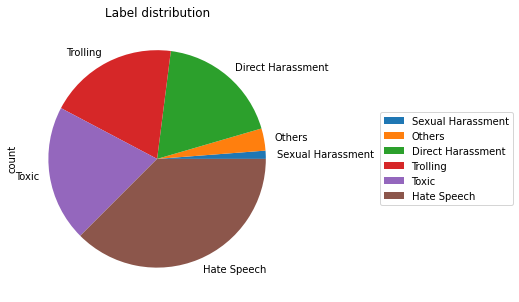

In [41]:
labels2 = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic", "none"]
df_distribution = usa_news[labels2].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.drop('none').plot.pie(y='count',
                                      title='Label distribution',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [42]:
df_distribution.sort_values('count', ascending=False)

,count
none,15241.0
Hate Speech,739.0
Toxic,399.0
Trolling,380.0
Direct Harassment,364.0
Others,65.0
Sexual Harassment,24.0


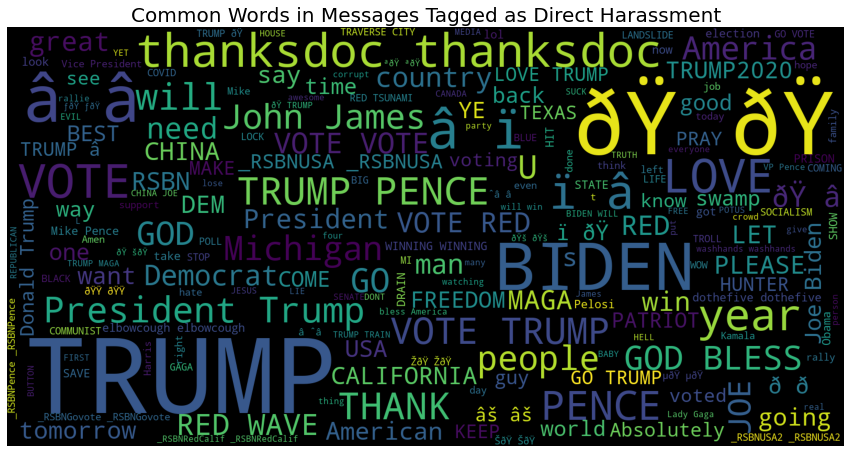

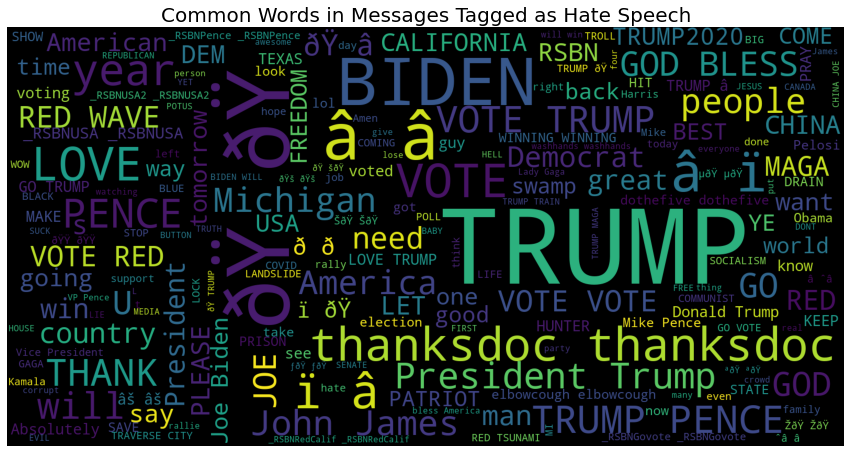

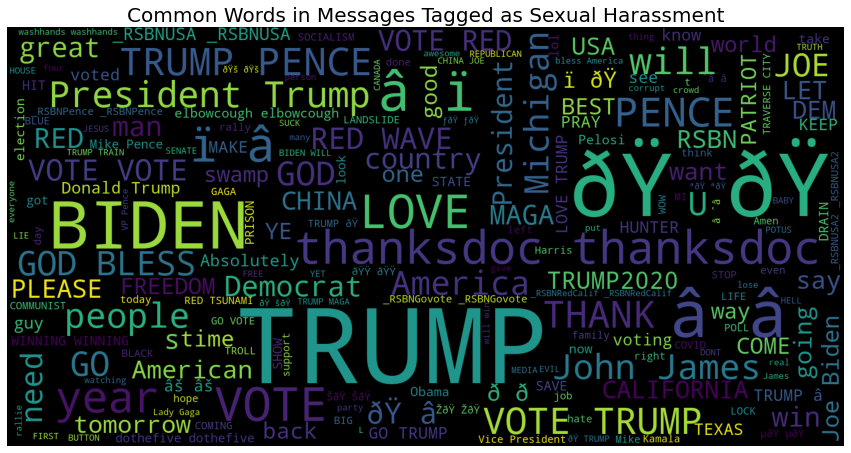

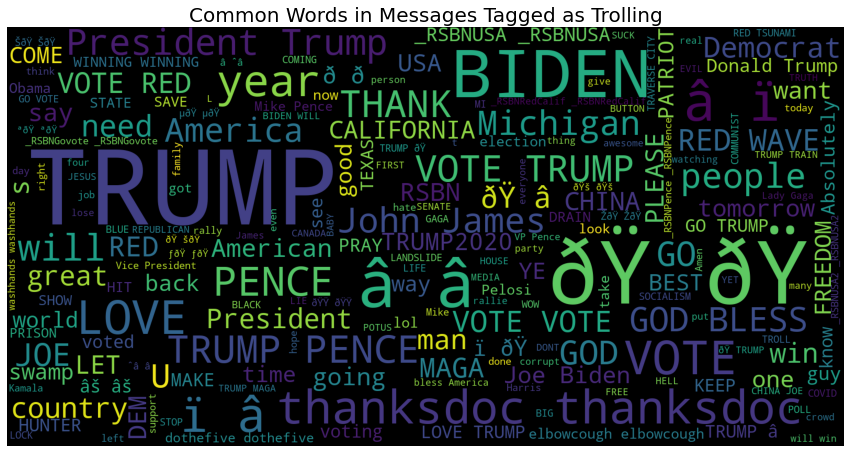

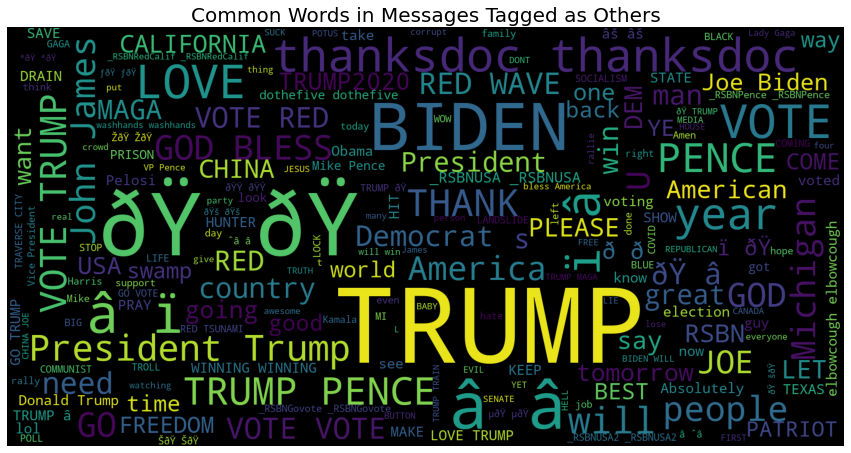

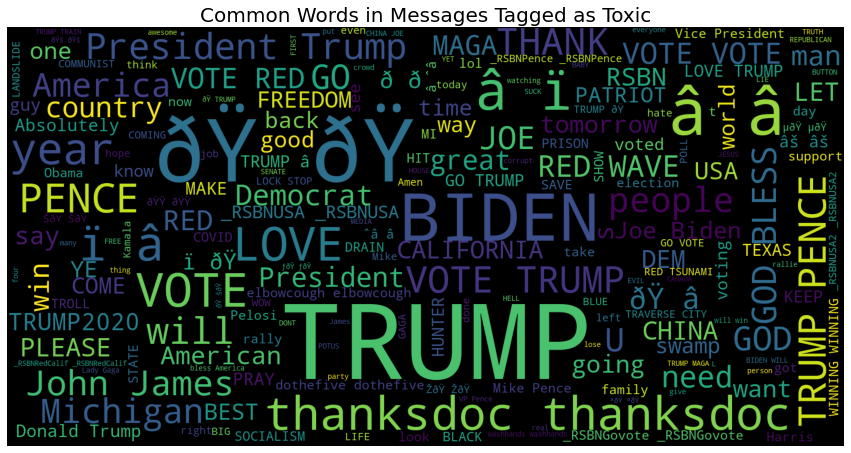

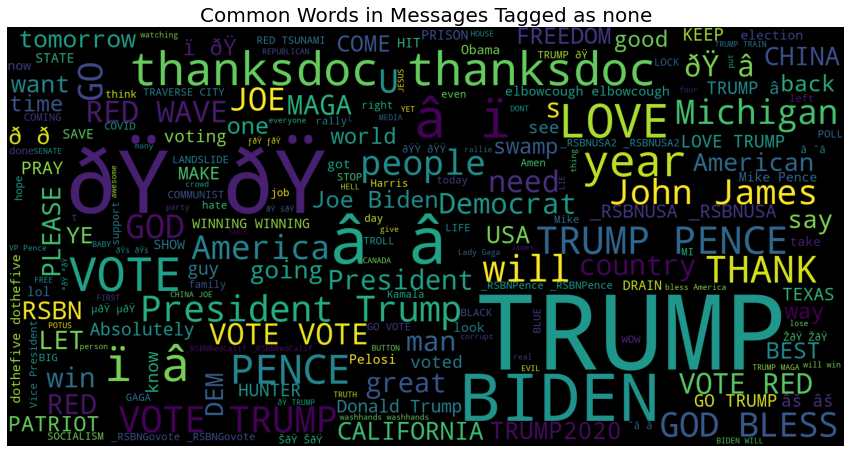

In [46]:
def word_cloud(documents, label):
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(' '.join(documents))

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Common Words in Messages Tagged as {label}", size=20)
    plt.show()

for label in labels2:
    word_cloud(usa_news['message'], label)

In [ ]:
text = nltk.word_tokenize("And now for something completely different")

In [118]:
#Data Cleaning
from nltk.corpus import words
import contractions

def extract_words(text):
    text = contractions.fix(text)
    regex = re.compile('[' + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    return nopunct

def lemmatize(word, tag):
    if tag.startswith("NN"):
        return wordnet_lemmatizer.lemmatize(word, pos='n')
    elif tag.startswith('VB'):
        return wordnet_lemmatizer.lemmatize(word, pos='v')
    elif tag.startswith('JJ'):
        return wordnet_lemmatizer.lemmatize(word, pos='a')
    else:
        return word

def tokenize(text):
    tokens = nltk.pos_tag(nltk.word_tokenize(text))
    words = []
    for word, tag in tokens:
        words.append(lemmatize(word, tag))
    words = [w for w in words if not w in stops]
    words = [w for w in words if not w in string.punctuation]
    return words

usa_news['clean_message'] = usa_news['message'].apply(extract_words)
usa_news['tokenized'] = usa_news['clean_message'].apply(tokenize)
# "would" in words.words()
# True

In [91]:
usa_news['tokenized']

0                                [democrat, be, terrorist]
1        [let, us, be, honest, they, be, not, vote, for...
2               [where, would, we, be, if, not, for, rsbn]
3        [they, will, not, be, happy, when, they, be, r...
4                                                  [trump]
                               ...                        
16678                 [our, vote, will, drain, the, swamp]
16679    [biden, may, be, elect, president, tuesday, bu...
16680                                              [trump]
16681        [i, do, not, want, no, woman, for, president]
16682                        [god, bless, and, thank, you]
Name: tokenized, Length: 16683, dtype: object

In [121]:
def get_tfidf_vect(documents):
    vectorizer = TfidfVectorizer(ngram_range=(2,3), tokenizer=tokenize, max_df=0.85, analyzer = 'word', min_df=1, max_features=10000, stop_words='english', lowercase=True)
    vector = vectorizer.fit_transform(documents)
    feature_names = np.array(vectorizer.get_feature_names())
    return pd.DataFrame(vector.todense(), columns=feature_names), vector, feature_names

In [122]:
df, vector, features = get_tfidf_vect(usa_news['message'])

In [123]:
display(df)

,'' --,'' -- joe,'' ``,'' `` https,'' america,'' come,'' joe,'' joe biden,'' president,'' s,...,🧠 remember vote,🧡 💛,🧡 💛 💙,🧱 biden,🧱 biden rise,🧱 tax,🧱 tax 🧱,🧱 🧱,🧱 🧱 tax,🧱 🧱 🧱
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
df[labels] = usa_news[labels]

,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
16678,0.0,0.0,0.0,0.0,0.0,0.0
16679,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,1.0,0.0,0.0,0.0,0.0


In [191]:
top_words = {}
top_words_list = []
for label in labels:
    df_label = df[df[label] == 1.0]
    tfidf = df_label[features]
    importance = np.argsort(np.asarray(tfidf.reset_index(drop=True).sum(axis=0)).ravel())[::-1]
    top_words[label] = list(features[importance[:10]])
    top_words_list.extend(list(features[importance[:10]]))

In [192]:
print(top_words_list)

['biden suck', 'biden jail', 'joe biden', 'biden racist', 'china joe', 'lady gaga', 'trump suck', 'beijing biden', 'biden prison', 'frack biden', 'china joe', 'vote trump', 'biden suck', 'vote biden', 'biden prison', 'joe biden', 'biden 2020', 'moron biden', 'lady gaga', 'trump win', 'lady gag', 'lady gaga', 'gag lady', 'make gag', 'make gag lady', 'commie bitch', 'buck fiden', 'gaga make', 'joe kameltoe', 'trump campaign', 'joe biden', "biden 's", 'biden prison', 'china joe', 'moron biden', 'beijing biden', 'biden corrupt', 'crime family', 'vote biden', 'biden win', 'sunny yu', 'beijing biden', 'biden voter', 'live matter', 'terror attack', 'trump trump', 'face mask', 'vice president', 'veteran die', 'austria war', 'biden suck', 'joe biden', 'lady gaga', 'trump suck', 'vote biden', 'china joe', 'cnn suck', 'moron biden', 'moises sanchez', 'vote trump']


In [201]:
top_features = [w for w in features if w in top_words_list]
corr_columns = top_features + labels
df[corr_columns]

,austria war,beijing biden,biden 's,biden 2020,biden corrupt,biden jail,biden prison,biden racist,biden suck,biden voter,...,veteran die,vice president,vote biden,vote trump,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.32676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.30418,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16678,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16679,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.088815,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0


In [222]:
df_corr = df[corr_columns].corr(method="spearman")
x = df_corr.drop(columns=top_features)
x.info()
x

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, austria war to Toxic
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Direct Harassment  45 non-null     float64
 1   Hate Speech        45 non-null     float64
 2   Sexual Harassment  45 non-null     float64
 3   Trolling           45 non-null     float64
 4   Others             45 non-null     float64
 5   Toxic              45 non-null     float64
dtypes: float64(6)
memory usage: 2.5+ KB


,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
austria war,-0.002003,-0.002887,-0.000509,-0.002047,0.070919,-0.002099
beijing biden,0.080150,0.066135,-0.000930,0.061917,0.077096,0.012200
biden 's,0.010423,0.033175,-0.001789,0.052623,-0.002949,0.050940
biden 2020,0.004037,0.012923,-0.002977,0.003418,-0.004905,0.007763
biden corrupt,0.049546,0.020091,-0.000882,0.048364,-0.001453,0.013263
biden jail,0.074919,0.030972,-0.001176,0.021225,-0.001938,0.020493
biden prison,0.053969,0.048114,-0.001556,0.052614,0.020912,0.031908
biden racist,0.115934,0.046764,-0.000657,-0.002643,-0.001083,-0.002710
biden suck,0.085868,0.078282,0.037761,0.013850,-0.002518,0.130316
biden voter,0.011303,0.005095,-0.001018,-0.004096,0.070099,0.039696


<AxesSubplot:>

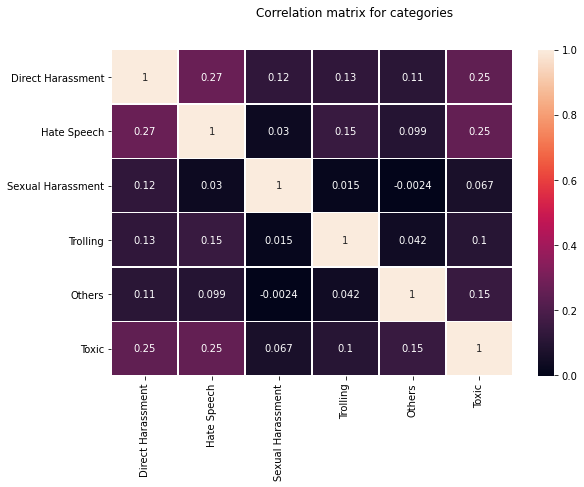

In [241]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(df[labels].corr(), annot=True, linewidths=.5, ax=ax)

In [220]:
df[labels].corr(method="pearson")


,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
austria war,-0.002003,-0.002887,-0.000509,-0.002047,0.070919,-0.002099
beijing biden,0.080150,0.066135,-0.000930,0.061917,0.077096,0.012200
biden 's,0.010423,0.033175,-0.001789,0.052623,-0.002949,0.050940
biden 2020,0.004037,0.012923,-0.002977,0.003418,-0.004905,0.007763
biden corrupt,0.049546,0.020091,-0.000882,0.048364,-0.001453,0.013263
biden jail,0.074919,0.030972,-0.001176,0.021225,-0.001938,0.020493
biden prison,0.053969,0.048114,-0.001556,0.052614,0.020912,0.031908
biden racist,0.115934,0.046764,-0.000657,-0.002643,-0.001083,-0.002710
biden suck,0.085868,0.078282,0.037761,0.013850,-0.002518,0.130316
biden voter,0.011303,0.005095,-0.001018,-0.004096,0.070099,0.039696


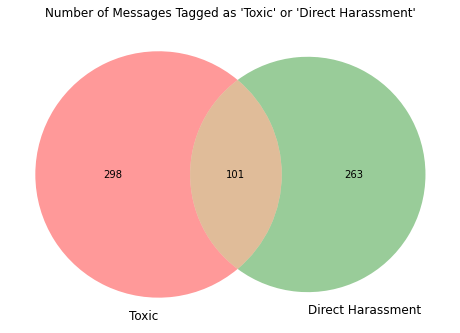

In [251]:
from matplotlib_venn import venn2
t = df[(df['Toxic'] == 1) & (df['Direct Harassment'] == 0)].shape[0]
d = df[(df['Toxic'] == 0) & (df['Direct Harassment'] == 1)].shape[0]
t_d = df[(df['Toxic'] == 1) & (df['Direct Harassment'] == 1)].shape[0]

h =  df[(df['Toxic'] == 0) & (df['Hate Speech'] == 1)].shape[0]
t_h = df[(df['Toxic'] == 1) & (df['Hate Speech'] == 1)].shape[0]
# Make the diagram

plt.figure(figsize=(8, 8))
plt.title("Number of Messages Tagged as 'Toxic' or 'Direct Harassment'")
venn2(subsets = (t, d, t_d), 
      set_labels=('Toxic', 'Direct Harassment'))
plt.show()

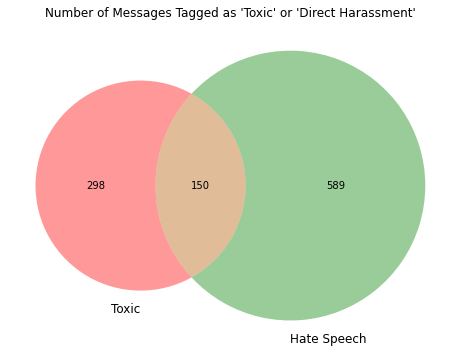

In [252]:
plt.figure(figsize=(8, 8))
plt.title("Number of Messages Tagged as 'Toxic' or 'Direct Harassment'")
venn2(subsets = (t, h, t_h), 
      set_labels=('Toxic', 'Hate Speech'))
plt.show()

In [257]:
unl = usa_news
unl[labels] = df[labels]
t_df = unl[(unl['Toxic'] == 1) & (unl['Direct Harassment'] == 0)]
print(list(t_df['message']))

['BLM = 💩', 'Don\'t miss Joe Biden starring in "High Plains Grifter," coming soon to a dem-run crap-hole near you.', 'Joe Biden is made in China', 'WHO LET ALL OF THE$E BE@UT1FUL DEPL0R@BLE CHUMP$$$ OUT!!!!! MUST OF BEEN SENT FROM GOD!!!', 'joe biden is crona virus', 'netherlands sucks', 'save the fking oil industry', 'BAN ALL FACE DIAPERS... FIRE FAUCI 🔥', 'Aoc is a ho', 'Communist, crack dealers and cults for sloppy joe!', 'fucl off u can not say anything about netherland', '🤕 LIBERAL HEADS CURRENTLY EXPLODING 🤕', 'Dearbornistan sucks.', '2020/666=30330 Team Joe A vote for Joe Biden is a vote for Satan', 'TRUMP SUCKS!!!!', 'BIDEN 4 BACK ON THE TRASH HEAP !', 'BULLSHIT RACIST RANT', 'CRACK HOUSES 4 BIDEN !', 'SO MANY RETARDS', 'RETARDS', "@taehoon you're clearly a commie", 'Rachel D you a damn dumb idiot', 'no F you zion', 'ignorant cnn voters are for gerritol joe!, i almost want biden to win, just so the idiots that voted for him could see what he will do to them, beleive me, they wo

In [260]:
unl = usa_news
unl[labels] = df[labels]
h_df = unl[(unl['Toxic'] == 1) & (unl['Direct Harassment'] == 1)]
print(list(t_df['message']))

['Biden needs more Adrenochrome Supply to remember stuff', 'A VOTE FOR BIDEN IS A VOTE FOR THE COMMUNIST CHINA', 'BIDEN CRIME FAMILY', 'DRAIN THE SWAMP AND LOCK THEM UP! LOCK UP BIDEN! LOCK UP HILLARY! LOCK UP OBAMA! ❤TRUMP🤍2020💙', 'Discount Obama lmao', 'Creepy joe', 'Democrats are evil 😈 😈 😈 devils', 'Communist China Joe for the Biden crime family.', "Biden's wom.....gg's", 'BIDEN TESTED POSITIVE FOR CORRUPTION', 'Does anyone know how sloppy Joe’s senate race is going? He thinks he’s running against George Bush 😂', 'hiden tested postive for being an idiot', "Fiona YOU'RE TRASH LIKE BIDEN", 'RETARDS 4 BIDEN !', 'RETARDS FOR BIDEN/KAMALATOE 2020 !!! FULL SUPPORT FROMTHE RETARDS', 'yo biden trolls - we whoopin your A-S-S-', 'Joe Biden is soooooo crooked', 'biden💩💩💩💩💩🦴', 'Imbeciles for Biden.', 'Kenton Klassen is a weak sauce communist.', 'i hope trump fail', 'Gaga has demons', 'god shes so stupid', 'Bidens Banging GAGA !!!!!!!!!!', 'Trump is trash', 'f*** BUM biden', 'Biden is racist. H

In [259]:
unl = usa_news
unl[labels] = df[labels]
t_df = unl[(unl['Toxic'] == 0) & (unl['Direct Harassment'] == 1)]
print(list(t_df['message']))

['Biden needs more Adrenochrome Supply to remember stuff', 'A VOTE FOR BIDEN IS A VOTE FOR THE COMMUNIST CHINA', 'BIDEN CRIME FAMILY', 'DRAIN THE SWAMP AND LOCK THEM UP! LOCK UP BIDEN! LOCK UP HILLARY! LOCK UP OBAMA! ❤TRUMP🤍2020💙', 'Discount Obama lmao', 'Creepy joe', 'Democrats are evil 😈 😈 😈 devils', 'Communist China Joe for the Biden crime family.', "Biden's wom.....gg's", 'BIDEN TESTED POSITIVE FOR CORRUPTION', 'Does anyone know how sloppy Joe’s senate race is going? He thinks he’s running against George Bush 😂', 'hiden tested postive for being an idiot', "Fiona YOU'RE TRASH LIKE BIDEN", 'RETARDS 4 BIDEN !', 'RETARDS FOR BIDEN/KAMALATOE 2020 !!! FULL SUPPORT FROMTHE RETARDS', 'yo biden trolls - we whoopin your A-S-S-', 'Joe Biden is soooooo crooked', 'biden💩💩💩💩💩🦴', 'Imbeciles for Biden.', 'Kenton Klassen is a weak sauce communist.', 'i hope trump fail', 'Gaga has demons', 'god shes so stupid', 'Bidens Banging GAGA !!!!!!!!!!', 'Trump is trash', 'f*** BUM biden', 'Biden is racist. H

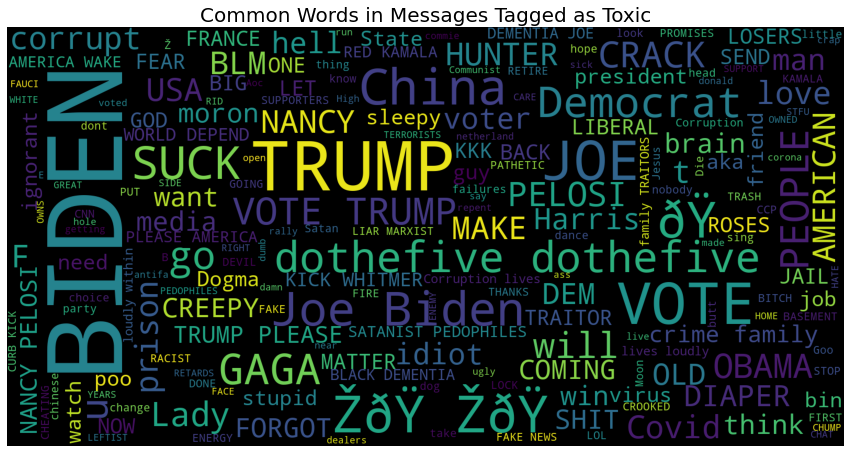

In [240]:
word_cloud(t_df['message'], "Toxic")

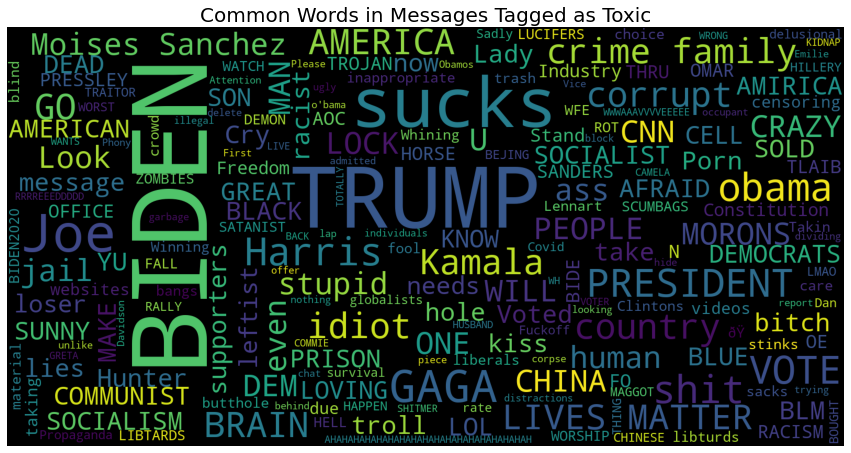

In [261]:
word_cloud(h_df['message'], "Toxic")